# Probability and Statistics Week 6

- toc: true
- badges: true
- comments: true
- categories: [jupyter]

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [5]:
preg = pd.read_csv("./LectureCode/2002FemPreg.tsv", sep='\t')
live = preg[preg['outcome'] == 1]

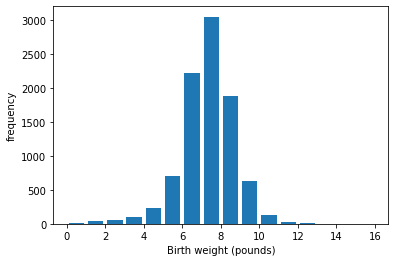

In [10]:
plt.hist(live['birthwgt_lb'], rwidth=0.8, label='birthwgt_lb', bins=range(int(live['birthwgt_lb'].min()), int(live['birthwgt_lb'].max() + 2)))
plt.xlabel('Birth weight (pounds)')
plt.ylabel('frequency')
plt.show()
plt.close()

In [11]:
hist = {key: val for key, val in enumerate(np.bincount(live['birthwgt_lb'].dropna()))}

In [12]:
hist

{0: 8,
 1: 40,
 2: 53,
 3: 98,
 4: 229,
 5: 697,
 6: 2223,
 7: 3049,
 8: 1889,
 9: 623,
 10: 132,
 11: 26,
 12: 10,
 13: 3,
 14: 3,
 15: 1}

In [14]:
n = sum(hist.values())
pmf = hist.copy()
for x, freq in hist.items():
    pmf[x] = freq / n

In [15]:
pmf

{0: 0.0008806693086745927,
 1: 0.004403346543372964,
 2: 0.005834434169969176,
 3: 0.01078819903126376,
 4: 0.025209158960810215,
 5: 0.07672831351827389,
 6: 0.24471598414795245,
 7: 0.3356450902686041,
 8: 0.2079480405107882,
 9: 0.06858212241303391,
 10: 0.01453104359313078,
 11: 0.0028621752531924264,
 12: 0.001100836635843241,
 13: 0.00033025099075297226,
 14: 0.00033025099075297226,
 15: 0.00011008366358432408}

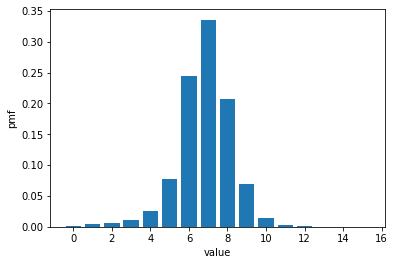

In [16]:
plt.bar(pmf.keys(), pmf.values())
plt.xlabel('value')
plt.ylabel('pmf')
plt.show()
plt.close()

In [18]:
print(sum(pmf.values()))

1.0


In [21]:
values = [1, 2, 2, 3, 5]
pmf = {key : val/len(values) for key, val in enumerate(np.bincount(values)) if val != 0}

In [22]:
pmf

{1: 0.2, 2: 0.4, 3: 0.2, 5: 0.2}

In [25]:
pmf = {key: val / len(live['prglngth'].dropna()) for key, val in enumerate(np.bincount(live['prglngth'].dropna()))}

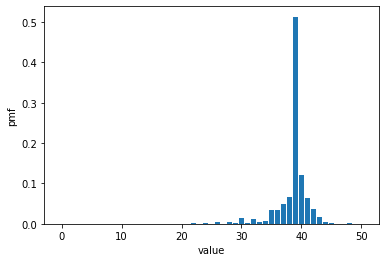

In [26]:
plt.bar(pmf.keys(), pmf.values())
plt.xlabel('value')
plt.ylabel('pmf')
plt.show()
plt.close()

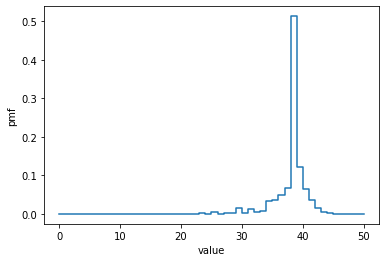

In [27]:
plt.step(list(pmf.keys()), list(pmf.values()))
plt.xlabel('value')
plt.ylabel('pmf')
plt.show()
plt.close()

In [36]:
firsts = live[live['birthord'] == 1]
others = live[live['birthord'] > 1]
first_pmf = {key: val / len(firsts['prglngth'].dropna()) for key, val in enumerate(np.bincount(firsts['prglngth'].dropna()))}
others_pmf = {key: val / len(others['prglngth'].dropna()) for key, val in enumerate(np.bincount(others['prglngth'].dropna()))}

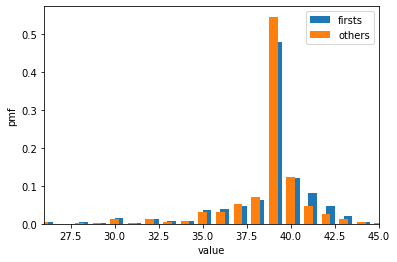

In [43]:
plt.bar(first_pmf.keys(), first_pmf.values(), width=0.5, align='edge', label='firsts')
plt.bar(others_pmf.keys(), others_pmf.values(), width=0.5, align='center', label='others')
plt.xlabel('value')
plt.ylabel('pmf')
plt.legend()
plt.xlim(26, 45)
plt.show()
plt.close()

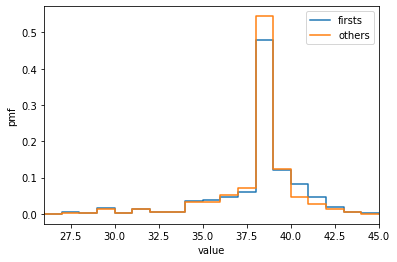

In [44]:
plt.step(list(first_pmf.keys()), list(first_pmf.values()), label='firsts')
plt.step(list(others_pmf.keys()), list(others_pmf.values()), label='others')
plt.xlabel('value')
plt.ylabel('pmf')
plt.xlim(26, 45)
plt.legend()
plt.show()
plt.close()

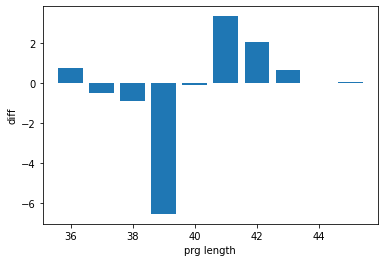

In [45]:
weeks = range(36, 46)
diffs = []
for week in weeks:
    p1 = first_pmf[week]
    p2 = others_pmf[week]
    diff = 100 * (p1 - p2)
    diffs.append(diff)

plt.bar(weeks, diffs)
plt.xlabel('prg length')
plt.ylabel('diff')
plt.show()
plt.close()

In [46]:
live = preg[preg['outcome'] == 1]
firsts = live[live['birthord'] == 1]
others = live[live['birthord'] > 1]

In [48]:
first_wgt_dropna = firsts['totalwgt_lb'].dropna()
other_wgt_dropna = others['totalwgt_lb'].dropna()

In [55]:
first_hist, first_bins = np.histogram(first_wgt_dropna, bins=np.arange(0, 16, 0.05))
other_hist, other_bins = np.histogram(other_wgt_dropna, bins=np.arange(0, 16, 0.05))
first_pmf = {key: val / len(first_wgt_dropna) for key, val in zip(first_bins, first_hist)}
other_pmf = {key: val / len(other_wgt_dropna) for key, val in zip(other_bins, other_hist)}

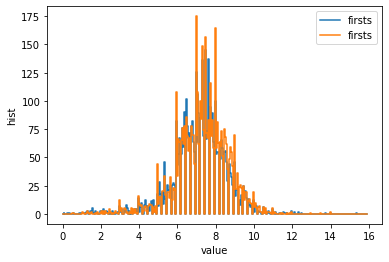

In [54]:
plt.step(first_bins[:-1], first_hist, label='firsts')
plt.step(other_bins[:-1], other_hist, label='firsts')
plt.xlabel('value')
plt.ylabel('hist')
plt.legend()
plt.show()
plt.close()

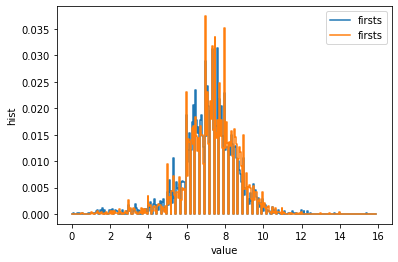

In [56]:
plt.step(list(first_pmf.keys()), list(first_pmf.values()), label='firsts')
plt.step(list(other_pmf.keys()), list(other_pmf.values()), label='firsts')
plt.xlabel('value')
plt.ylabel('hist')
plt.legend()
plt.show()
plt.close()

In [59]:
def PercentileRank(scores, your_score):
    count = 0
    for score in scores:
        if score <= your_score:
            count += 1
    
    percentile_rank = 100 * count / len(scores)
    return percentile_rank

In [60]:
t = [55, 66, 77, 88, 99]
PercentileRank(t, 88)

80.0

In [61]:
def Percentile(scores, percentile_rank):
    for score in sorted(scores):
        if PercentileRank(scores, score) >= percentile_rank:
            return score

Percentile(t, 45)

77

In [62]:
def Percentile2(scores, percentile_rank):
    scores.sort()
    index = percentile_rank * (len(scores) - 1) // 100
    return scores[index]

Percentile2(t, 45)

66

In [63]:
def evalCdf(sample, x):
    count = 0.0
    for value in sorted(sample):
        if value <= x:
            count += 1
    prob = count / len(sample)
    return prob

def getValCdf(sample, cdf_value):
    for score in sorted(sample):
        if evalCdf(sample, score) >= cdf_value:
            return score

def evalCdfCdf(cdf, target_val):
    for val, score in sorted(cdf.items()):
        if val >= target_val:
            return score

def getValCdfCdf(cdf, cdf_value):
    for val, score in sorted(cdf.items()):
        if score >= cdf_value:
            return val

In [64]:
t = [1, 2, 3, 4, 5]
print(evalCdf(t, 3))

0.6


In [68]:
def pmf2cdf(pmf_dict):
    cdf_dict = {}
    now = 0.0
    for k, v in sorted(pmf_dict.items()):
        now += v
        cdf_dict[k] = now
    return cdf_dict

In [69]:
first_hist, first_bins = np.histogram(first_wgt_dropna, bins=np.arange(0, 16, 0.05))
other_hist, other_bins = np.histogram(other_wgt_dropna, bins=np.arange(0, 16, 0.05))
live_wgt_dropna = live['totalwgt_lb'].dropna()
live_hist, live_bins = np.histogram(live_wgt_dropna, bins=np.arange(0, 16, 0.05))

first_pmf = {key: val / len(first_wgt_dropna) for key, val in zip(first_bins, first_hist)}
other_pmf = {key: val / len(other_wgt_dropna) for key, val in zip(other_bins, other_hist)}
live_pmf = {key: val / len(live_wgt_dropna) for key, val in zip(live_bins, live_hist)}

first_cdf = pmf2cdf(first_pmf)
other_cdf = pmf2cdf(other_pmf)
live_cdf = pmf2cdf(live_pmf)

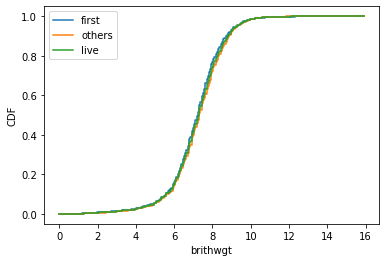

In [73]:
plt.step(list(first_cdf.keys()), list(first_cdf.values()), label='first')
plt.step(list(other_cdf.keys()), list(other_cdf.values()), label='others')
plt.step(list(live_cdf.keys()), list(live_cdf.values()), label='live')
plt.xlabel('brithwgt')
plt.ylabel('CDF')
plt.legend()
plt.show()
plt.close()

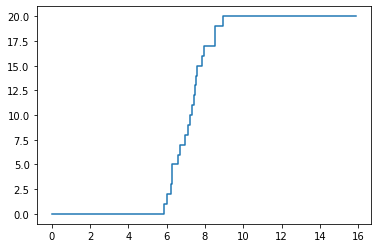

In [76]:
sample = np.random.choice(live_wgt_dropna, 20, replace=True)
sample_hist, sample_bins = np.histogram(sample, bins=np.arange(0, 16, 0.05))
sample_pmf = {key: val for key, val in zip(sample_bins, sample_hist)}
sample_cdf = pmf2cdf(sample_pmf)

plt.step(list(sample_cdf.keys()), list(sample_cdf.values()))
plt.show()
plt.close()